# TP 1 Modèles Markoviens 
Echantillonnage de champs markoviens.

Le but de cette séance est de programmer un échantillonneur de Gibbs et de l'étudier dans le cas d'un champ binaire.

Les données et programme sont accessibles sur le site:
http://perso.telecom-paristech.fr/~tupin/cours/IMA203/TPMARKOV

Dans cette section on considère un champ markovien binaire (valeurs dans $E=\{0,1\}$). Le voisinage est défini par la 4-connexité et le potentiel d'une clique d'ordre 2 est défini par  $U_c(0,1)=U_c(1,0)=+\beta$ et $U_c(1,1)=U_c(0,0)=0$ (le potentiel des cliques singleton est nul).


In [1]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

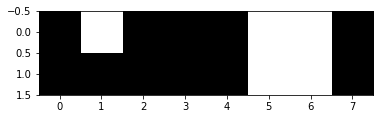

In [5]:
plt.set_cmap('gray')
 
sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

#Q1 
Pour le modèle d'Ising comme défini plus haut et l'image imaU générée dans la cellule précédente, rappeler la formule de l'énergie globale et calculer l'énergie globale d'imaU

#A1 $U(x) = \sum_{c\in \mathcal{C}} V_c(x)$

Pour imaU j'obtiens : $7U(0,1) + 11U(0,0) + 4(1,1) = 7\beta$


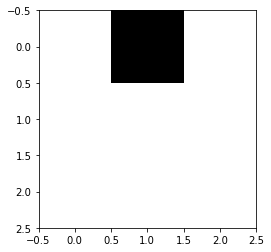

In [6]:
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

#Q2 
Ecrivez la forme générale de la probabilité conditionnelle locale en un pixel $s$. Pour la configuration de voisinage imaVois générée par la cellule de code précédente, calculer les 2 énergies conditionnelles locales (pour la valeur 0 et pour la valeur 1 du pixel central), puis les probabilités conditionnelles locales (en fonction de $\beta$). Quelle est la classe la plus probable ? (NB : on fera le calcul en 8-connexité).

#A2
$U_s(x_s,V_s) = \sum_{c\in \mathcal{C},s\in c}U_c(x_s,V_s)$
Energies locales:

$U_s(0|V_s) = U(0,0)+7U(0,1) = 7\beta$

$U_s(1|V_s) = 7U(1,1) + U(1,0) = \beta \implies \mathbb{P}(X_s=0|V_s) = e^{-7\beta}/Z_s$

$\mathbb{P}(X_s=1|V_s) = e^{-\beta}/Z_s$ avec $Z_s = e^{-\beta} + e^{-7\beta}$

Si $\beta$ est positif la classe la plus probable est 1, si $\beta$ est négatif la classe la plus probable est 0

## Part 1
Programmation de l'échantillonneur de Gibbs et tirage d'échantillons de modèles markoviens 

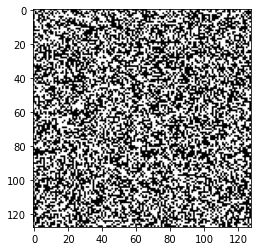

In [7]:
plt.set_cmap('gray')
 
sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Fonction echan
Compléter la fonction suivante qui prend en entrée une image binaire qui sera mise à jour par échantillonnage de Gibbs et la valeur du paramètre de régularisation 

In [22]:
def echan(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          #ne pas modifier ces indices 
          #ils permettent d'accéder aux pixels voisins 
          # i1,j et i2,j et i,j1 et i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # compléter le calcul des énergies et proba assosiées 
        # énergie et proba non normalisée lorsque le pixel est mis dans la classe 0
            
            Ureg0= beta_reg*(int(1==im_bin[i1,j]) +int(1==im_bin[i2,j]) + int(1==im_bin[i,j1])+int(1==im_bin[i,j2]))
            p0=math.exp(-Ureg0);

        # énergie et proba non normalisée lorsque le pixel est mis dans la classe 0
            Ureg1=beta_reg*(int(0==im_bin[i1,j]) +int(0==im_bin[i2,j]) + int(0==im_bin[i,j1])+int(0==im_bin[i,j2]))
            p1=math.exp(-Ureg1);

        #tirage selon les probabilités normalisées NB la normalisation est effectuée ici
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin

En faisant varier la valeur du paramètre de régularisation et en relançant la cellule, observez. Vous pouvez enlever la visualisation en cours d'échantillonnage et augmenter le nombre d'itérations. 


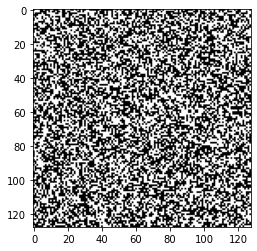

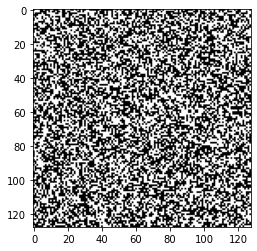

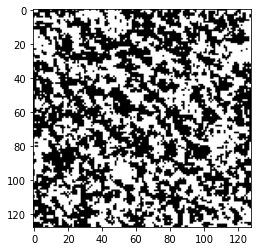

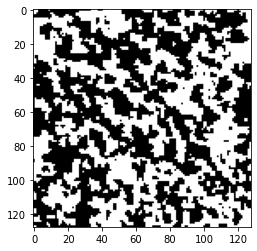

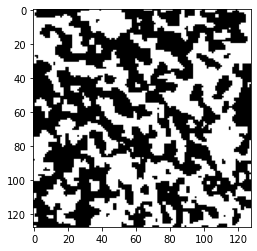

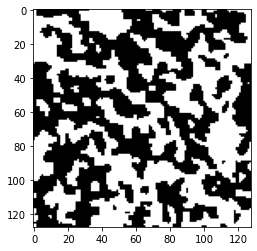

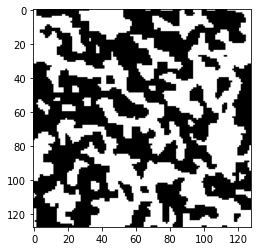

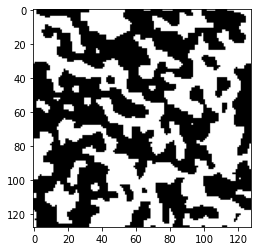

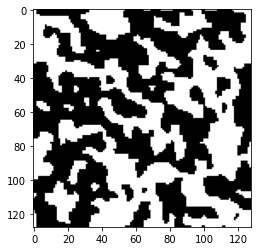

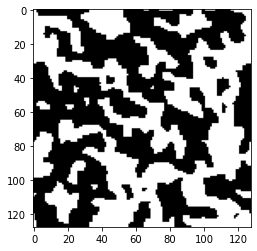

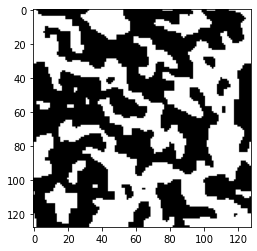

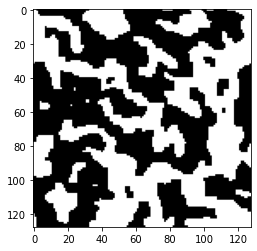

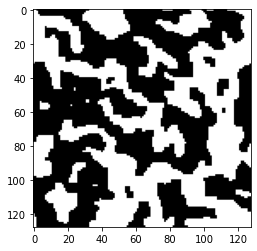

In [23]:

#initialisation aléatoire de im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=10

mafigure=plt.figure()
plt.imshow(im_bin);        
mafigure.canvas.draw()
plt.show()

for n in range(10):  
    echan(im_bin,beta_reg) 
    plt.imshow(im_bin)      
    mafigure.canvas.draw()
    plt.show(block=False)
    

plt.figure()
plt.imshow(im_bin)
plt.show()

#Q3
Faites tourner le programme plusieurs fois. Obtenez vous toujours la même image ? Commentez. 

<Figure size 432x288 with 0 Axes>

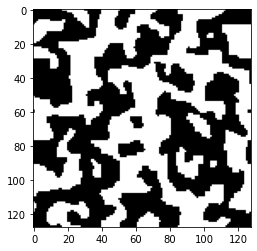

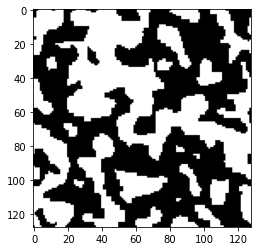

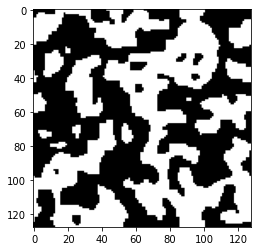

In [56]:
plt.set_cmap('gray')
sh=[128,128]
im_bin0=2-np.ceil(2*np.random.rand(*sh))

beta_reg=10

for i in range(3):
    im_bin=im_bin0.copy()

    for n in range(10):  
        
        echan(im_bin,beta_reg) 
    plt.figure()
    plt.imshow(im_bin)


plt.show()

#A3 On n'obtient pas les même images car à l'attribution de la valeur du pixel i,j à chaque itération, on fait un tirage aléatoire. Cependant les 3 images ont toutes le même système d'échantillonage

#Q4
Faites varier $\beta$ de 0.5 à 20. Commentez les résultats. 

<Figure size 432x288 with 0 Axes>

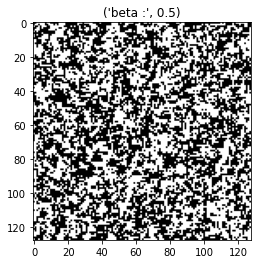

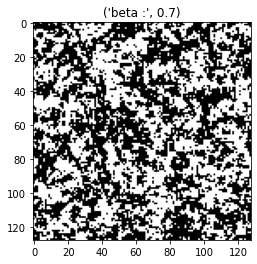

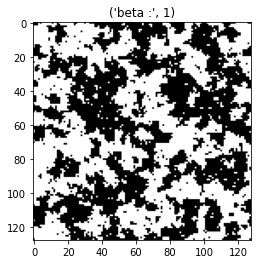

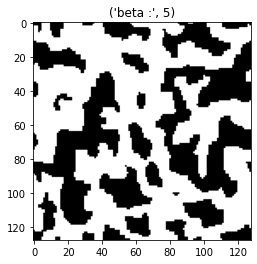

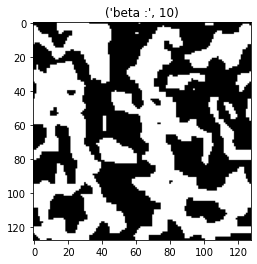

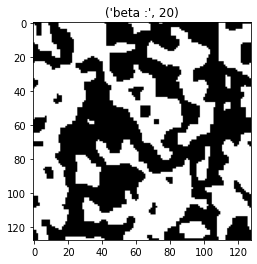

In [57]:
plt.set_cmap('gray')
sh=[128,128]
im_bin0=2-np.ceil(2*np.random.rand(*sh))

betas=[0.5,0.7,1,5,10,20]

for i in range(len(betas)):
    im_bin=im_bin0.copy()
    beta_reg=betas[i]

    for n in range(10):  
        
        echan(im_bin,beta_reg) 
    plt.figure()
    plt.imshow(im_bin)
    plt.title(("beta :",beta_reg))


plt.show()

#A4 Plus beta est grand, plus l'image est segmentée/regoupée en zones uniformes (de même valeurs) et moins on a de contours. Cependant à partir de beta > 5 l'image résultante se ressemble.

#Q5 
Quelle est l'image qui minimise globalement l'énergie pour ce modèle ?


#A5
L'énergie est est minimisée pour des valeurs de béta petites, c'est à dire pour des images non uniformes, avec beaucoup de pixels différents au voisinage. Pour beta positif on minimise |$\beta$| et pour beta négatif on maximise |$\beta$|

#Q6
Changez $\beta$ et donnez lui une valeur négative. Décrivez le résultat et justifiez le. 

<Figure size 432x288 with 0 Axes>

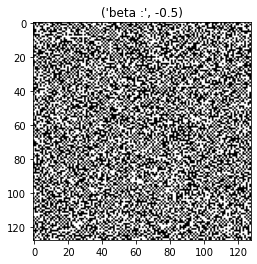

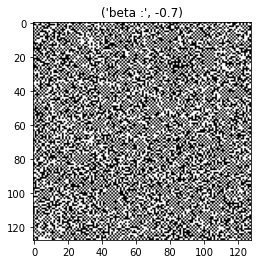

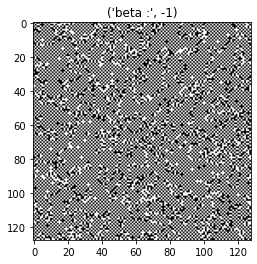

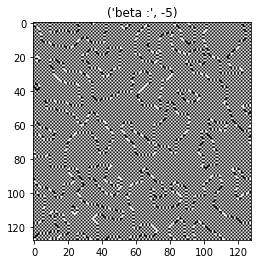

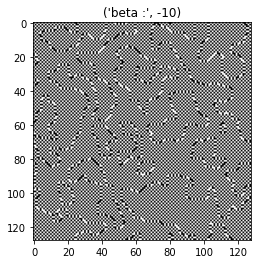

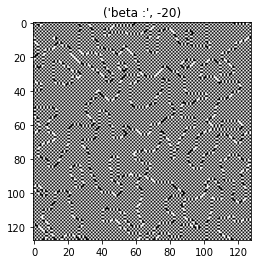

In [58]:
plt.set_cmap('gray')
sh=[128,128]
im_bin0=2-np.ceil(2*np.random.rand(*sh))

betas=[-0.5,-0.7,-1,-5,-10,-20]

for i in range(len(betas)):
    im_bin=im_bin0.copy()
    beta_reg=betas[i]

    for n in range(10):  
        
        echan(im_bin,beta_reg) 
    plt.figure()
    plt.imshow(im_bin)
    plt.title(("beta :",beta_reg))


plt.show()

#A6 Ici puls beta est petit, beta négatif (donc on augmente sa valeur absolue), plus on obtient des zones en "damier". Or l'énergie diminue avec beta donc cette configuration minimise l'energie.

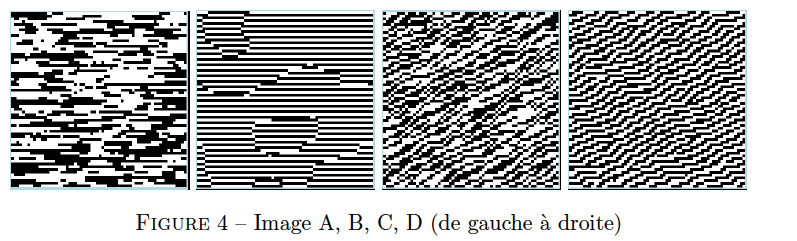

#Q7 
On travaille maintenant en 8 connexité, mais toujours avec des cliques d'ordre 2 (non isotropes cette fois). Pour chacune des images suivantes, proposez les potentiels des cliques qui permettent d'obtenir ces réalisations. Au départ tous les potentiels de clique sont nuls. 


*   Image A : il y a un seul potentiel de clique d'ordre 2 qui vaut -1.
*    Image B : en plus du précédent, il y a un potentiel de clique d'ordre 2 qui vaut 1. Indiquez lequel.
*    Image C : en plus des 2 précédents, il y a un potentiel de clique d'ordre 2 qui vaut -1. Indiquez lequel.
*    Image D : en plus des 3 précédents, il y a un potentiel de clique d'ordre 2 qui vaut +1. Indiquez lequel.




#A7
- Image A : Ici en mettant un potentiel négatif on maximise configuration de la clique correspondante. Puisque l'image est en ligne horizontale (uniforme horizontalement), on a mis un potentiel négatif pour les cliques verticales: Vh(0,0)=-1, Vh(1,1) =-1


- Image B: Ici on minimise une certaine configuration puisque beta ets positif. On minimise la configauration uniforme verticale car on voit que globalement d'une ligne à l'autre on change de valeur de pixel. Donc en plus on a Vv(0,0)=Vv(1,1) = 1


- Image C : Beta négatif donc on maximise une configuration. On remarque que la diagonale à 45° est maximisée en étant uniforme. Donc en plus on a Vdiag45(0,0)=Vdiag45(1,1) =-1


- Image D : Beta positif donc on minimise une configuration. On voit que la configuration qui est minimiser est la diagonale 135° en étant uniforme . Donc en plus on a Vdiag135(0,0)=Vdiag135(1,1) =1


#Q8
Modifiez votre programme pour définir un modèle d'Ising avec un potentiel attractif en diagonale uniquement (les autres potenttiels sont nuls). Commentez le résultat. 

<Figure size 432x288 with 0 Axes>

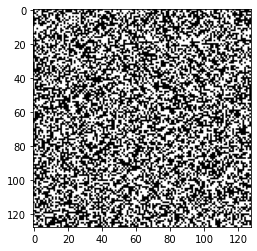

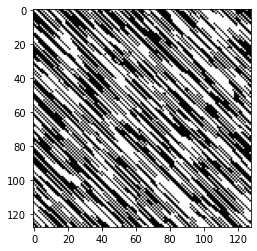

In [77]:
def q8(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          #ne pas modifier ces indices 
          #ils permettent d'accéder aux pixels voisins 
          # i1,j et i2,j et i,j1 et i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # compléter le calcul des énergies et proba assosiées 
        # énergie et proba non normalisée lorsque le pixel est mis dans la classe 0
            
            Ureg0= beta_reg*(int(1==im_bin[i1,j1]) +int(1==im_bin[i2,j2]))
            p0=math.exp(-Ureg0);

        # énergie et proba non normalisée lorsque le pixel est mis dans la classe 0
            Ureg1=beta_reg*(int(0==im_bin[i1,j1]) +int(0==im_bin[i2,j2]))
            p1=math.exp(-Ureg1);

        #tirage selon les probabilités normalisées NB la normalisation est effectuée ici
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin

plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))

beta_reg=10

mafigure=plt.figure()
plt.imshow(im_bin);        
mafigure.canvas.draw()
plt.show()

for n in range(20):  
    q8(im_bin,beta_reg) 

    

plt.figure()
plt.imshow(im_bin)
plt.show()

#A8 Quand on veut favoriser une configuration, il faut que son potentiel soit plus petit que les autres. Ici on veut favoriser les lignes diagonales donc on peut appliquer un potentiel négatif pour les cliques diagonales uniformes ou appliquer un potentiel positif pour les cliques diagonales en "damier ". J'ai donc appliqué un potentiel beta positif pour les cliques suivantes : 
$U_{diag}(0,1)=U_{diag}(1,0)=\beta$ sur une diagonale